In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# vim:fileencoding=utf-8

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Для решения данной задачи я выбрал алгоритм К-средних (K-means)

#получаем набор данных из файла
df = pd.read_csv('task2.csv', sep=';')
df.head()

,stat_1,stat_2,stat_3,stat_4
0,-1.968067,-22.370058,-11.385996,-19.388304
1,7.796681,-9.686054,-7.386393,11.636603
2,11.232707,-11.616259,-13.963754,11.035038
3,-7.431386,-2.881275,-16.752395,-20.350752
4,9.229358,-5.420281,-11.678623,13.369752


In [2]:
#зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=666)

#фиксируем диапазон для количества кластеров
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#в цикле, используя метод кластеризации K-Means разбиваем данные на указанное число кластеров
#далее, смотрим коэффициент силуэта (внутренняя метрика для оценки качества кластеризации)

for n_clusters in range_n_clusters:
    clustering = KMeans(n_clusters=n_clusters)
    clustering.fit(df)
    silhouette_avg = silhouette_score(df, clustering.labels_)
    print("For n =", n_clusters,
          "clusters, the average silhouette_score is :", silhouette_avg)

For n = 2 clusters, the average silhouette_score is : 0.4720968316204961
For n = 3 clusters, the average silhouette_score is : 0.5255998781867595
For n = 4 clusters, the average silhouette_score is : 0.589374616139179
For n = 5 clusters, the average silhouette_score is : 0.6308523081951911
For n = 6 clusters, the average silhouette_score is : 0.6870955256541973
For n = 7 clusters, the average silhouette_score is : 0.6798184106062525
For n = 8 clusters, the average silhouette_score is : 0.7009475617283484
For n = 9 clusters, the average silhouette_score is : 0.5247260073442525


In [4]:
#из результата видно, что самое подходящее количество кластеров = 8,
#поскольку коэффициент силуэта при нём максимален

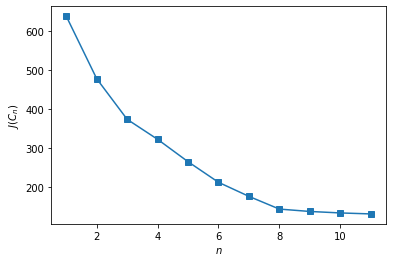

In [5]:
#так же можно убедиться в результате при помощи критерия оценки J(C),
#суммы квадратов расстояний от точек до центроидов кластеров, к которым они относятся
#об этом подробнее в прикрепленном файле additional_task.txt

inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k).fit(df)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 12), inertia, marker='s');
plt.xlabel('$n$')
plt.ylabel('$J(C_n)$');